## Preparation for the CellPhoneDB Analysis of the Vascular cells of the SKM
By Monika Litvinukova <br/>
Latest update 29.05.20

### Import required modules

In [1]:
import os
import numpy as np
import pandas as pd
import scanpy as sc

/opt/conda/lib/python3.7/site-packages/anndata/_core/anndata.py:21: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex
/opt/conda/lib/python3.7/site-packages/dask/config.py:161: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


### Read object - raw counts

In [2]:
muscle_vas = sc.read_h5ad('/home/jovyan/Mona/data/SKM/Vascular/hca_skm_vas_scGEN_annotated_ml200528_raw.h5ad')
muscle_vas

AnnData object with n_obs × n_vars = 9220 × 33538 
    obs: 'CoD', 'NRP', 'age', 'batch', 'cell_source', 'cell_states_global', 'cell_type', 'cell_types', 'combined', 'donor', 'gender', 'leiden', 'merged_source', 'n_counts', 'n_genes', 'percent_mito', 'percent_ribo', 'sample', 'scrublet_score', 'source', 'version', 'leiden03', 'leiden04', 'leiden05', 'leiden06', 'leiden07', 'leiden08', 'leiden1', 'cell_states'
    var: 'gene_ids-mus_SNuc7444586-cells-cells', 'feature_types-mus_SNuc7444586-cells-cells', 'gene_ids-mus_SNuc7468112-cells-cells', 'feature_types-mus_SNuc7468112-cells-cells', 'gene_ids-mus_SNuc7511880-cells-cells', 'feature_types-mus_SNuc7511880-cells-cells', 'gene_ids-5386STDY7600838-cells-cells', 'feature_types-5386STDY7600838-cells-cells', 'gene_ids-5386STDY7645353-cells-cells', 'feature_types-5386STDY7645353-cells-cells', 'gene_ids-5386STDY7645354-cells-cells', 'feature_types-5386STDY7645354-cells-cells', 'gene_ids-mus_SNuc7444585-nuclei-cells', 'feature_types-mus_SNuc7444

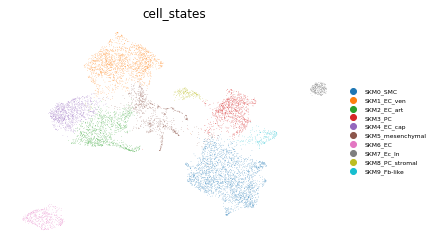

In [3]:
sc.pl.umap(muscle_vas, color = ['cell_states'], size = 1, legend_fontsize = 6, frameon = False)

In [4]:
population_heart = muscle_vas.copy()

In [6]:
annot_key = 'cell_states'
gene_names = population_heart.var.index

counts = pd.DataFrame(population_heart.X.T.todense(), index = gene_names, columns = population_heart.obs_names)
meta = pd.DataFrame(population_heart.obs[annot_key])
counts.to_csv('/home/jovyan/Mona/data/CellphoneDB/SKM/counts.tsv', sep = '\t')
meta.to_csv('/home/jovyan/Mona/data/CellphoneDB/SKM/meta.tsv', sep = '\t')